In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_column', 55)

In [24]:
# Getting data
data = pd.read_csv('/content/drive/MyDrive/public_up_to_150k_12_220930.csv')

In [25]:
data

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,4559397800,5/28/2020,353,PPP,"ARLINGTON CONSULTANTS GROUP, LLC",4601 FAIRFAX DR STE 1200,ARLINGTON,VA,22203-1500,7/17/2021,Paid in Full,24,100,85000.00,85000.00,0.0,NaN,73259,United Bank,11185 Fairfax Blvd,FAIRFAX,VA,22030-5049,U,N,N,Existing or more than 2 years old,ARLINGTON,ARLINGTON,VA,22203-1500,VA-08,5.0,541618.0,Unanswered,Unknown/NotStated,NaN,85000.00,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),73259,United Bank,FAIRFAX,VA,Unanswered,Unanswered,NaN,85885.42,6/24/2021
1,4784467107,4/13/2020,304,PPP,"ELEVATING EQUIPMENT INSPECTION SERVICE, LLC",208 w depot street,BEDFORD,VA,24523-1936,4/16/2021,Paid in Full,24,100,85000.00,85000.00,0.0,NaN,73215,American National Bank and Trust Company,628 Main St,DANVILLE,VA,24541-1320,R,Y,N,Existing or more than 2 years old,BEDFORD,BEDFORD,VA,24523-1936,VA-05,11.0,238290.0,Unanswered,Unknown/NotStated,NaN,85000.00,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),73215,American National Bank and Trust Company,DANVILLE,VA,Unanswered,Unanswered,NaN,85774.44,3/16/2021
2,4939997010,4/4/2020,353,PPP,SIERRA CORP.,6723 Whittier Avenue Suite 204,MC LEAN,VA,22101-4509,1/9/2021,Paid in Full,24,100,85000.00,85000.00,0.0,NaN,122517,Atlantic Union Bank,"1051 E Cary St, Ste 103",RICHMOND,VA,23219-4029,U,N,N,Existing or more than 2 years old,MC LEAN,FAIRFAX,VA,22101-4509,VA-08,4.0,541513.0,Unanswered,Unknown/NotStated,NaN,85000.00,NaN,NaN,NaN,NaN,NaN,Corporation,122517,Atlantic Union Bank,RICHMOND,VA,Unanswered,Unanswered,NaN,81567.00,12/15/2020
3,5055638002,6/26/2020,353,PPP,BROWNE AND ASSOCIATES LLC,1203 Bishopsgate Way,Reston,VA,20194-1407,10/28/2021,Paid in Full,60,100,85000.00,85000.00,0.0,NaN,123499,BayFirst National Bank,700 Central Avenue,Saint Petersburg,FL,33701,U,N,N,Unanswered,Reston,FAIRFAX,VA,20194-1407,VA-11,6.0,531210.0,Unanswered,Unknown/NotStated,NaN,85000.00,NaN,0.0,NaN,NaN,NaN,Limited Liability Company(LLC),188567,Loan Source Incorporated,NEW YORK,NY,Unanswered,Unanswered,NaN,85908.22,8/3/2021
4,5145117704,5/1/2020,353,PPP,BUILT BY BEAVERS LLC,5628 MOUNT BURNSIDE WAY,BURKE,VA,22015-2143,9/25/2021,Paid in Full,24,100,85000.00,85000.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,BURKE,FAIRFAX,VA,22015-2143,VA-11,6.0,561990.0,White,Unknown/NotStated,NaN,85000.00,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,86054.93,7/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599877,9947448400,2/18/2021,897,PPP,TANYA LOGHRY,2122 E 11th St,Cheyenne,WY,82001-5227,NaN,Exemption 4,60,100,465.00,465.00,0.0,NaN,121536,Customers Bank,99 Bridge St,PHOENIXVILLE,PA,19460-3411,U,N,N,Existing or more than 2 years old,Cheyenne,LARAMIE,WY,82001-5227,WY-,1.0,492210.0,White,Not Hispanic or Latino,NaN,463.00,NaN,NaN,NaN,NaN,NaN,Independent Contractors,529652,"Amur Equipment Finance, Inc.",Grand Island,NE,Female Owned,Non

In [26]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599882 entries, 0 to 599881
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   599882 non-null  int64  
 1   DateApproved                 599882 non-null  object 
 2   SBAOfficeCode                599882 non-null  int64  
 3   ProcessingMethod             599882 non-null  object 
 4   BorrowerName                 599874 non-null  object 
 5   BorrowerAddress              599876 non-null  object 
 6   BorrowerCity                 599877 non-null  object 
 7   BorrowerState                599882 non-null  object 
 8   BorrowerZip                  599877 non-null  object 
 9   LoanStatusDate               562492 non-null  object 
 10  LoanStatus                   599882 non-null  object 
 11  Term                         599882 non-null  int64  
 12  SBAGuarantyPercentage        599882 non-null  int64  
 13 

In [27]:
#Checking for nulls
data.isnull().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        8
BorrowerAddress                     6
BorrowerCity                        5
BorrowerState                       0
BorrowerZip                         5
LoanStatusDate                  37390
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                 177
FranchiseName                  591648
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [28]:
data = data.loc[data['BorrowerName'].notnull()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599874 entries, 0 to 599881
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   599874 non-null  int64  
 1   DateApproved                 599874 non-null  object 
 2   SBAOfficeCode                599874 non-null  int64  
 3   ProcessingMethod             599874 non-null  object 
 4   BorrowerName                 599874 non-null  object 
 5   BorrowerAddress              599868 non-null  object 
 6   BorrowerCity                 599869 non-null  object 
 7   BorrowerState                599874 non-null  object 
 8   BorrowerZip                  599869 non-null  object 
 9   LoanStatusDate               562485 non-null  object 
 10  LoanStatus                   599874 non-null  object 
 11  Term                         599874 non-null  int64  
 12  SBAGuarantyPercentage        599874 non-null  int64  
 13 

In [29]:
# add a few columns to the data for analysis
data['year_approved'] = pd.DatetimeIndex(data['DateApproved']).year
data['month_approved'] = pd.DatetimeIndex(data['DateApproved']).month

data['Forgiveness_year'] = pd.DatetimeIndex(data['ForgivenessDate']).year
data['Forgiveness_month'] = pd.DatetimeIndex(data['ForgivenessDate']).month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599874 entries, 0 to 599881
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   599874 non-null  int64  
 1   DateApproved                 599874 non-null  object 
 2   SBAOfficeCode                599874 non-null  int64  
 3   ProcessingMethod             599874 non-null  object 
 4   BorrowerName                 599874 non-null  object 
 5   BorrowerAddress              599868 non-null  object 
 6   BorrowerCity                 599869 non-null  object 
 7   BorrowerState                599874 non-null  object 
 8   BorrowerZip                  599869 non-null  object 
 9   LoanStatusDate               562485 non-null  object 
 10  LoanStatus                   599874 non-null  object 
 11  Term                         599874 non-null  int64  
 12  SBAGuarantyPercentage        599874 non-null  int64  
 13 

In [36]:
First_round = data.loc[data['ProcessingMethod'] == 'PPP']

In [35]:
Second_round = data.loc[data['ProcessingMethod'] == 'PPS']

In [37]:
First_round.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,...,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,year_approved,month_approved,Forgiveness_year,Forgiveness_month
0,4559397800,5/28/2020,353,PPP,"ARLINGTON CONSULTANTS GROUP, LLC",4601 FAIRFAX DR STE 1200,ARLINGTON,VA,22203-1500,7/17/2021,Paid in Full,24,100,85000.0,85000.0,0.0,NaN,73259,United Bank,11185 Fairfax Blvd,FAIRFAX,VA,22030-5049,U,N,N,Existing or more than 2 years old,...,22203-1500,VA-08,5.0,541618.0,Unanswered,Unknown/NotStated,NaN,85000.0,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),73259,United Bank,FAIRFAX,VA,Unanswered,Unanswered,NaN,85885.42,6/24/2021,2020,5,2021.0,6.0
1,4784467107,4/13/2020,304,PPP,"ELEVATING EQUIPMENT INSPECTION SERVICE, LLC",208 w depot street,BEDFORD,VA,24523-1936,4/16/2021,Paid in Full,24,100,85000.0,85000.0,0.0,NaN,73215,American National Bank and Trust Company,628 Main St,DANVILLE,VA,24541-1320,R,Y,N,Existing or more than 2 years old,...,24523-1936,VA-05,11.0,238290.0,Unanswered,Unknown/NotStated,NaN,85000.0,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),73215,American National Bank and Trust Company,DANVILLE,VA,Unanswered,Unanswered,NaN,85774.44,3/16/2021,2020,4,2021.0,3.0
2,4939997010,4/4/2020,353,PPP,SIERRA CORP.,6723 Whittier Avenue Suite 204,MC LEAN,VA,22101-4509,1/9/2021,Paid in Full,24,100,85000.0,85000.0,0.0,NaN,122517,Atlantic Union Bank,"1051 E Cary St, Ste 103",RICHMOND,VA,23219-4029,U,N,N,Existing or more than 2 years old,...,22101-4509,VA-08,4.0,541513.0,Unanswered,Unknown/NotStated,NaN,85000.0,NaN,NaN,NaN,NaN,NaN,Corporation,122517,Atlantic Union Bank,RICHMOND,VA,Unanswered,Unanswered,NaN,81567.00,12/15/2020,2020,4,2020.0,12.0
3,5055638002,6/26/2020,353,PPP,BROWNE AND ASSOCIATES LLC,1203 Bishopsgate Way,Reston,VA,20194-1407,10/28/2021,Paid in Full,60,100,85000.0,85000.0,0.0,NaN,123499,BayFirst National Bank,700 Central Avenue,Saint Petersburg,FL,33701,U,N,N,Unanswered,...,20194-1407,VA-11,6.0,531210.0,Unanswered,Unknown/NotStated,NaN,85000.0,NaN,0.0,NaN,NaN,NaN,Limited Liability Company(LLC),188567,Loan Source Incorporated,NEW YORK,NY,Unanswered,Unanswered,NaN,85908.22,8/3/2021,2020,6,2021.0,8.0
4,5145117704,5/1/2020,353,PPP,BUILT BY BEAVERS LLC,5628 MOUNT BURNSIDE WAY,BURKE,VA,22015-2143,9/25/2021,Paid in Full,24,100,85000.0,85000.0,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,...,22015-2143,VA-11,6.0,561990.0,White,Unknown/NotStated,NaN,85000.0,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,86054.93,7/29/2021,2020,5,2021.0,7.0


In [ ]:
# Categorical variables
##Univariable


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


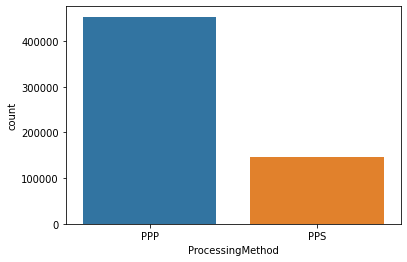

In [38]:
# count how many records are in each preprocessing method
sns.countplot(data['ProcessingMethod'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


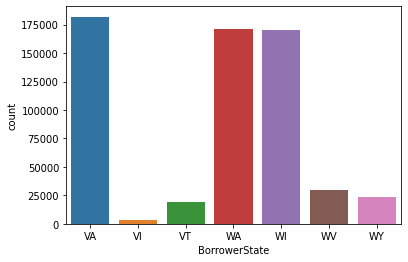

In [39]:
sns.countplot(data['BorrowerState'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


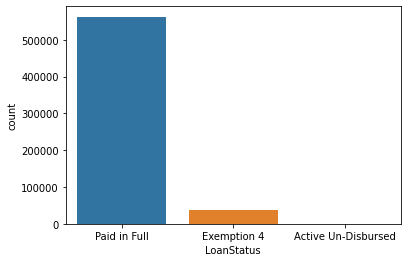

In [40]:
sns.countplot(data['LoanStatus'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


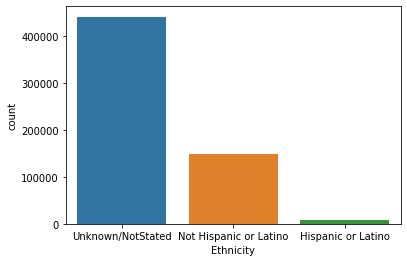

In [42]:
sns.countplot(data['Ethnicity'])

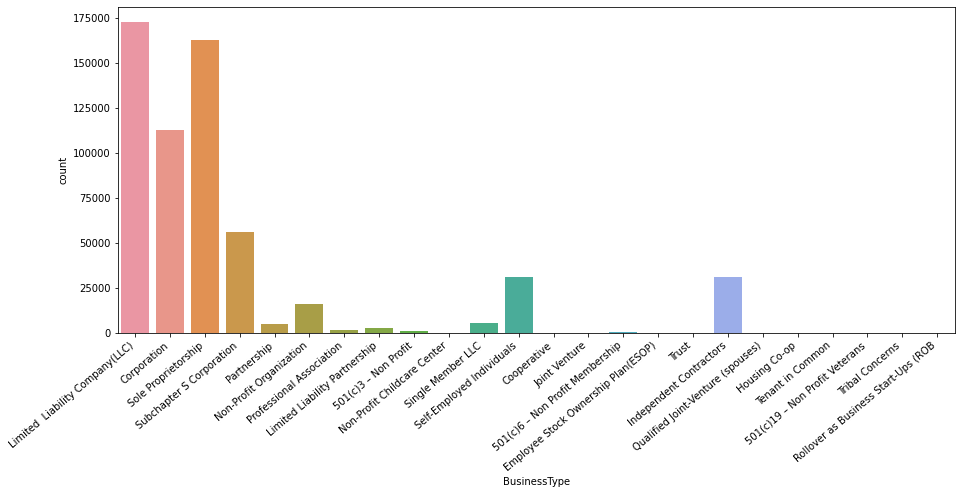

In [46]:
# Rotate the ticklabels
plt.figure(figsize=(15,6))
ax = sns.countplot(x = 'BusinessType', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.show()

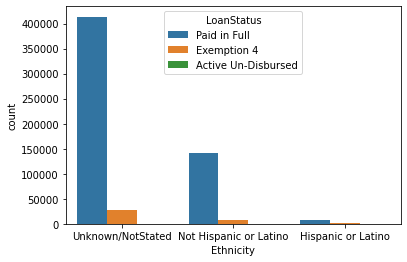

In [47]:
#BiVariate
#Plotting Ethnicity vs Status
sns.countplot(x = 'Ethnicity', hue ='LoanStatus', data = data)


In [48]:
# cross tabulation
pd.crosstab(data['BorrowerState'],data['Ethnicity'])

Ethnicity,Hispanic or Latino,Not Hispanic or Latino,Unknown/NotStated
BorrowerState,,,
VA,2756,39494,139693
VI,163,891,2059
VT,74,4999,14357
WA,3666,40256,127558
WI,1763,47797,120905
WV,158,9507,20287
WY,404,6090,16997


In [49]:
pd.crosstab(data['year_approved'],data['BorrowerState'])

BorrowerState,VA,VI,VT,WA,WI,WV,WY
year_approved,,,,,,,
2020,86752,1864,10785,90871,76660,15687,12155
2021,95191,1249,8645,80609,93805,14265,11336


In [50]:
pd.crosstab(data['Ethnicity'],data['LoanStatus'])

LoanStatus,Active Un-Disbursed,Exemption 4,Paid in Full
Ethnicity,,,
Hispanic or Latino,0,697,8287
Not Hispanic or Latino,4,8525,140505
Unknown/NotStated,4,28167,413685


In [ ]:
### Numerical Variables
# Discrete variables



In [51]:
# Descriptive Summary
data['CurrentApprovalAmount'].describe()

count    599874.000000
mean      27253.859585
std       28317.668417
min           1.800000
25%        8600.000000
50%       19382.000000
75%       33332.000000
max      149999.990000
Name: CurrentApprovalAmount, dtype: float64

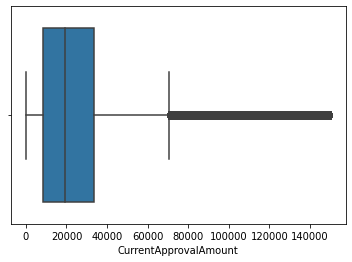

In [52]:
sns.boxplot(x = data["CurrentApprovalAmount"])

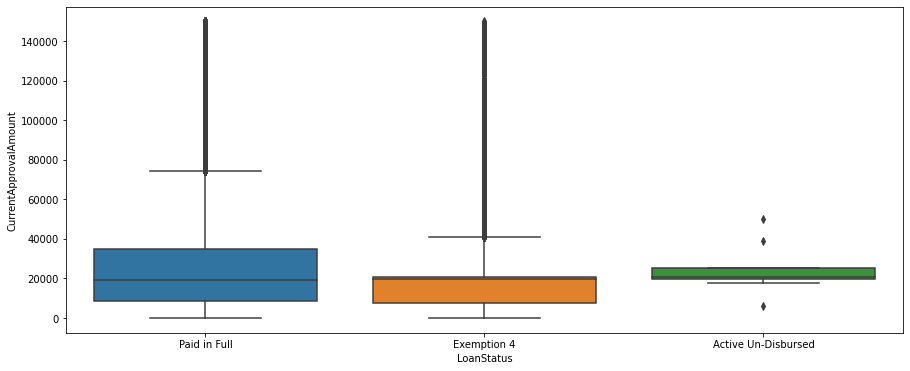

In [55]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'LoanStatus', y = 'CurrentApprovalAmount', data = data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


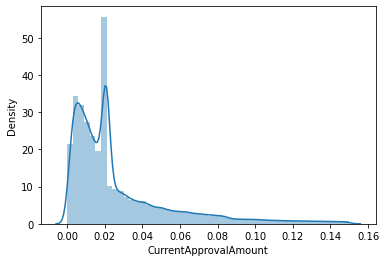

In [61]:
sns.distplot(data['CurrentApprovalAmount'] /10**6)

In [58]:
data['CurrentApprovalAmount'].skew()

1.958155922952324

In [59]:
data['CurrentApprovalAmount'].kurt()

3.8065212705765656

In [62]:
matrix = data.corr()

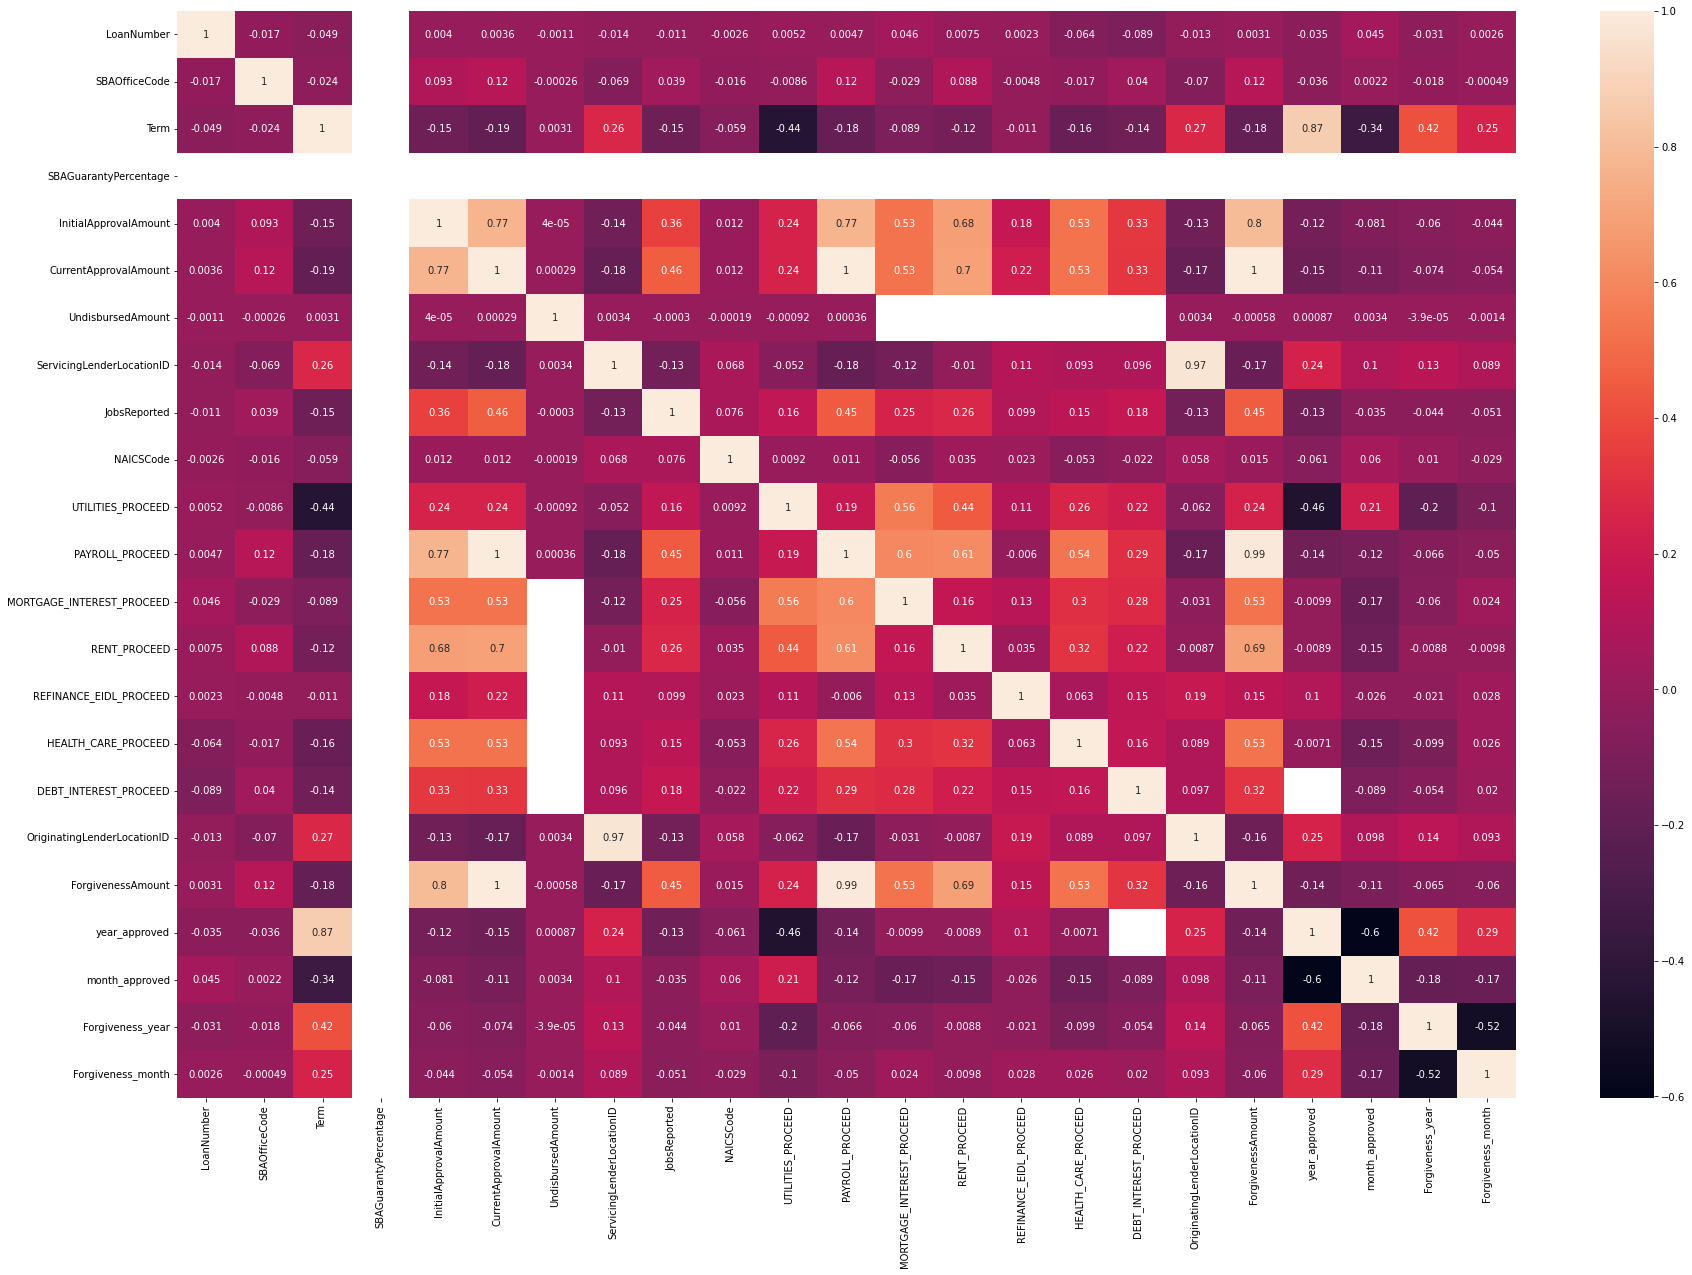

In [71]:
f, ax = plt.subplots(figsize = (30, 20))
sns.heatmap(matrix, annot= True)